In [1]:
## Avocado Project

In [2]:
## Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [4]:
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
 ## As per upper data we have 18249 rows and 14 columns

In [6]:
df.shape

(18249, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
## Checking the null values

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
## We can see that there is no Null values and it is good for our data

In [11]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
## Its show us null count for each column
## This shows us no missing value exist in dataset.This is great for our dataset

In [13]:
## Now we need to Changing the columns that had the numbers which indicates the Hass Size of the Avocado

In [14]:
df.rename(columns={'4046': 'Small Hass Size'},  inplace = True)
df.rename(columns={'4225': 'Large Hass Size'},  inplace = True)
df.rename(columns={'4770': 'XLarge Hass Size'}, inplace = True)

In [15]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,Small Hass Size,Large Hass Size,XLarge Hass Size,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [16]:
## Now we can drop the unnecessary column

In [17]:
df = df.drop(['Date', 'Unnamed: 0'], axis = 1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AveragePrice      18249 non-null  float64
 1   Total Volume      18249 non-null  float64
 2   Small Hass Size   18249 non-null  float64
 3   Large Hass Size   18249 non-null  float64
 4   XLarge Hass Size  18249 non-null  float64
 5   Total Bags        18249 non-null  float64
 6   Small Bags        18249 non-null  float64
 7   Large Bags        18249 non-null  float64
 8   XLarge Bags       18249 non-null  float64
 9   type              18249 non-null  object 
 10  year              18249 non-null  int64  
 11  region            18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
## Now turning the organic and coventional to 0 and 1

In [20]:
#organic and conventional
df_type = pd.get_dummies(df['type'])

df = pd.concat([df, df_type], axis=1)
print(df.sample(3))

       AveragePrice  Total Volume  Small Hass Size  Large Hass Size  \
63             0.95     433874.46        255933.32         91047.32   
12101          1.33       2674.51             0.00           409.45   
6329           1.18     385966.55        100370.00         55199.44   

       XLarge Hass Size  Total Bags  Small Bags  Large Bags  XLarge Bags  \
63               599.71    86294.11    41159.96    45134.15         0.00   
12101              0.00     2265.06      471.53     1793.53         0.00   
6329           46609.96   183787.15   155523.04     4802.95     23461.16   

               type  year   region  conventional  organic  
63     conventional  2015  Atlanta             1        0  
12101       organic  2016    Boise             0        1  
6329   conventional  2017  Detroit             1        0  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AveragePrice      18249 non-null  float64
 1   Total Volume      18249 non-null  float64
 2   Small Hass Size   18249 non-null  float64
 3   Large Hass Size   18249 non-null  float64
 4   XLarge Hass Size  18249 non-null  float64
 5   Total Bags        18249 non-null  float64
 6   Small Bags        18249 non-null  float64
 7   Large Bags        18249 non-null  float64
 8   XLarge Bags       18249 non-null  float64
 9   type              18249 non-null  object 
 10  year              18249 non-null  int64  
 11  region            18249 non-null  object 
 12  conventional      18249 non-null  uint8  
 13  organic           18249 non-null  uint8  
dtypes: float64(9), int64(1), object(2), uint8(2)
memory usage: 1.7+ MB


In [22]:
## As per upper data conventional is more in demand

In [23]:
df.head(5)

,AveragePrice,Total Volume,Small Hass Size,Large Hass Size,XLarge Hass Size,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,1,0


In [24]:
## Now we can dropped type Because it is unnecessary column 

In [25]:
df = df.drop(['type', 'region'], axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AveragePrice      18249 non-null  float64
 1   Total Volume      18249 non-null  float64
 2   Small Hass Size   18249 non-null  float64
 3   Large Hass Size   18249 non-null  float64
 4   XLarge Hass Size  18249 non-null  float64
 5   Total Bags        18249 non-null  float64
 6   Small Bags        18249 non-null  float64
 7   Large Bags        18249 non-null  float64
 8   XLarge Bags       18249 non-null  float64
 9   year              18249 non-null  int64  
 10  conventional      18249 non-null  uint8  
 11  organic           18249 non-null  uint8  
dtypes: float64(9), int64(1), uint8(2)
memory usage: 1.4 MB


In [27]:
## Turning Convetional and Organic from unsigned integer to float statistics

In [28]:
df['conventional'] = df['conventional'].astype('float64')
df.dtypes
df['conventional'] = df['conventional']
df['conventional'].sample(3)

3853     1.0
16356    0.0
8580     1.0
Name: conventional, dtype: float64

In [29]:
df['organic'] = df['organic'].astype('float64')
df.dtypes
df['organic'] = df['organic']
df['organic'].sample(3)

11526    1.0
8801     0.0
5456     0.0
Name: organic, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AveragePrice      18249 non-null  float64
 1   Total Volume      18249 non-null  float64
 2   Small Hass Size   18249 non-null  float64
 3   Large Hass Size   18249 non-null  float64
 4   XLarge Hass Size  18249 non-null  float64
 5   Total Bags        18249 non-null  float64
 6   Small Bags        18249 non-null  float64
 7   Large Bags        18249 non-null  float64
 8   XLarge Bags       18249 non-null  float64
 9   year              18249 non-null  int64  
 10  conventional      18249 non-null  float64
 11  organic           18249 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.7 MB


In [31]:
## This is the One Hot Encoder and I turned the Convetional and Organic to 0 and 1.

In [32]:
from sklearn.preprocessing import OneHotEncoder

con_enc = OneHotEncoder()
org_enc = OneHotEncoder()

cat_encoder = con_enc.fit_transform((df.conventional).values.reshape(-1,1)).toarray()
cat_encoder = org_enc.fit_transform((df.organic).values.reshape(-1,1)).toarray()

In [33]:
df.head()

,AveragePrice,Total Volume,Small Hass Size,Large Hass Size,XLarge Hass Size,Total Bags,Small Bags,Large Bags,XLarge Bags,year,conventional,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,1.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,1.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,1.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,1.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,1.0,0.0


In [34]:
## ## We need to check the skewness and average price of our numerical columns

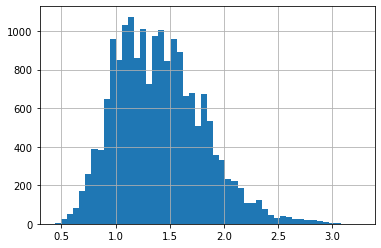

In [36]:
df["AveragePrice"].hist(bins=50)
plt.show()

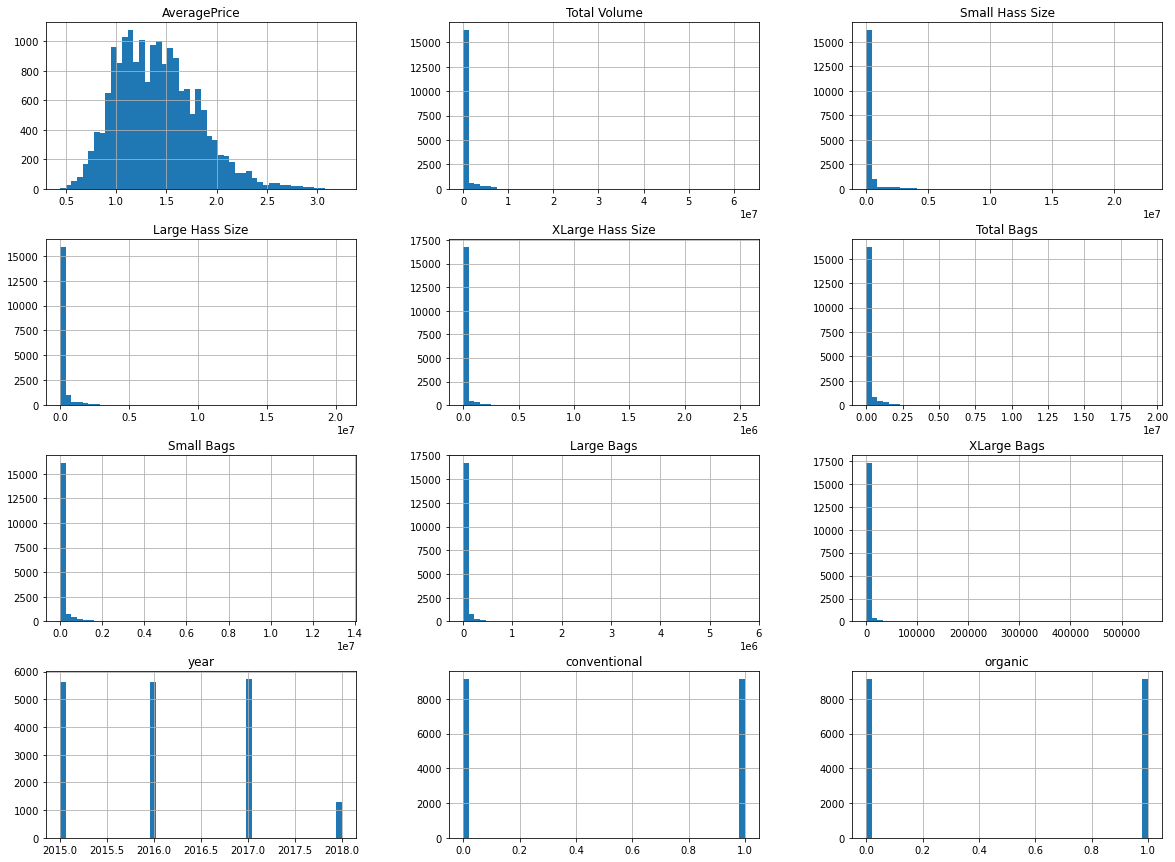

In [38]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [39]:
df = df.dropna(axis=0)

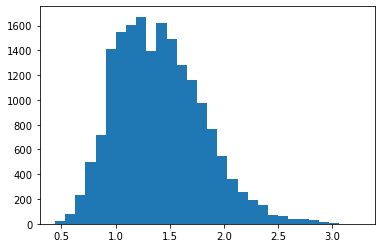

In [41]:
plt.hist(df['AveragePrice'], bins = 30)
plt.show()

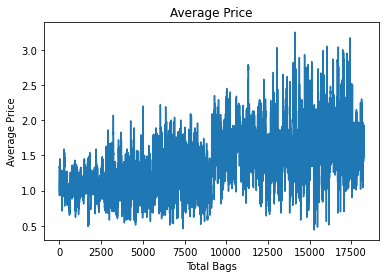

In [43]:
plt.plot(df['AveragePrice'])
plt.title('Average Price')
plt.xlabel('Total Bags')
plt.ylabel('Average Price')
plt.show()

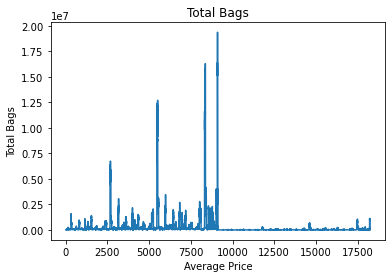

In [45]:
plt.plot(df['Total Bags'])
plt.title('Total Bags')
plt.xlabel('Average Price')
plt.ylabel('Total Bags')
plt.show()

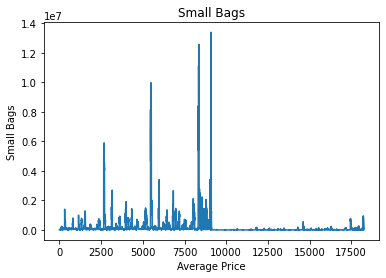

In [47]:
plt.plot(df['Small Bags'])
plt.title('Small Bags')
plt.xlabel('Average Price')
plt.ylabel('Small Bags')
plt.show()

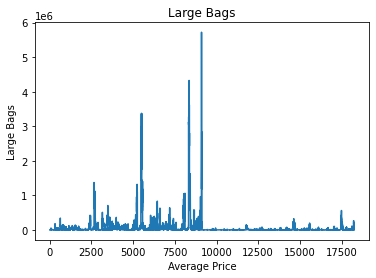

In [49]:
plt.plot(df['Large Bags'])
plt.title('Large Bags')
plt.xlabel('Average Price')
plt.ylabel('Large Bags')
plt.show()

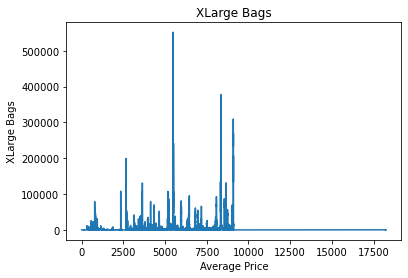

In [51]:
plt.plot(df['XLarge Bags'])
plt.title('XLarge Bags')
plt.xlabel('Average Price')
plt.ylabel('XLarge Bags')
plt.show()

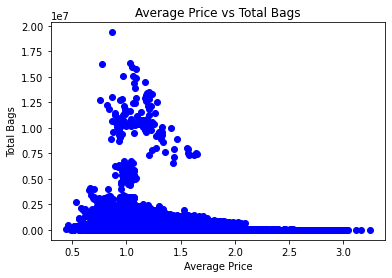

In [53]:
plt.scatter(df['AveragePrice'],df['Total Bags'], color='blue')
plt.title('Average Price vs Total Bags')
plt.xlabel('Average Price')
plt.ylabel('Total Bags')
plt.show()

In [ ]:
Statistics
Here are the statistics of all the categories.

The most important ones are Average Price and Total Bags

The interesting thing about these statistics are the size of the bags and the mean.

You can think that the extra large bags would have more mean, but in actuality, the small bags have more mean.

In [55]:
df.mean()

AveragePrice             1.405978
Total Volume        850644.013009
Small Hass Size     293008.424531
Large Hass Size     295154.568356
XLarge Hass Size     22839.735993
Total Bags          239639.202060
Small Bags          182194.686696
Large Bags           54338.088145
XLarge Bags           3106.426507
year                  2016.147899
conventional             0.500082
organic                  0.499918
dtype: float64

In [57]:
x= df['AveragePrice'].mean()
x

1.4059784097758825

In [59]:
x= df['Total Bags'].mean()
x

239639.20205983953

In [61]:
df.min()

AveragePrice           0.44
Total Volume          84.56
Small Hass Size        0.00
Large Hass Size        0.00
XLarge Hass Size       0.00
Total Bags             0.00
Small Bags             0.00
Large Bags             0.00
XLarge Bags            0.00
year                2015.00
conventional           0.00
organic                0.00
dtype: float64

In [63]:
df.max()

AveragePrice               3.25
Total Volume        62505646.52
Small Hass Size     22743616.17
Large Hass Size     20470572.61
XLarge Hass Size     2546439.11
Total Bags          19373134.37
Small Bags          13384586.80
Large Bags           5719096.61
XLarge Bags           551693.65
year                    2018.00
conventional               1.00
organic                    1.00
dtype: float64

In [64]:
df.median()

AveragePrice             1.37
Total Volume        107376.76
Small Hass Size       8645.30
Large Hass Size      29061.02
XLarge Hass Size       184.99
Total Bags           39743.83
Small Bags           26362.82
Large Bags            2647.71
XLarge Bags              0.00
year                  2016.00
conventional             1.00
organic                  0.00
dtype: float64

In [66]:
df.std()

AveragePrice        4.026766e-01
Total Volume        3.453545e+06
Small Hass Size     1.264989e+06
Large Hass Size     1.204120e+06
XLarge Hass Size    1.074641e+05
Total Bags          9.862424e+05
Small Bags          7.461785e+05
Large Bags          2.439660e+05
XLarge Bags         1.769289e+04
year                9.399385e-01
conventional        5.000137e-01
organic             5.000137e-01
dtype: float64

In [ ]:
Correlation

Not all the features are correlated with the Average Price column.

Instead most of them are correlated with each other.

In [68]:
corr_matrix = df.corr()
corr_matrix

,AveragePrice,Total Volume,Small Hass Size,Large Hass Size,XLarge Hass Size,Total Bags,Small Bags,Large Bags,XLarge Bags,year,conventional,organic
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,-0.615845,0.615845
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,0.232434,-0.232434
Small Hass Size,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,0.225819,-0.225819
Large Hass Size,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,0.232289,-0.232289
XLarge Hass Size,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,0.210027,-0.210027
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,0.217788,-0.217788
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,0.220535,-0.220535
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,0.193177,-0.193177
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,0.175483,-0.175483
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,0.000032,-0.000032


In [69]:
corr_matrix["AveragePrice"].sort_values(ascending=False)

AveragePrice        1.000000
organic             0.615845
year                0.093197
XLarge Bags        -0.117592
Large Hass Size    -0.172928
Large Bags         -0.172940
Small Bags         -0.174730
Total Bags         -0.177088
XLarge Hass Size   -0.179446
Total Volume       -0.192752
Small Hass Size    -0.208317
conventional       -0.615845
Name: AveragePrice, dtype: float64

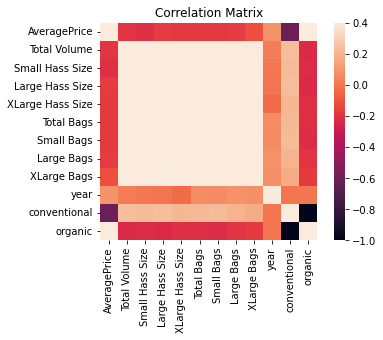

<Figure size 1440x1440 with 0 Axes>

In [81]:
sns.heatmap(df.corr(), vmax = 0.4, square = True)
plt.title("Correlation Matrix")
fig = plt.figure(figsize = (20, 20))
plt.show()

In [ ]:
## Lets check the Scatter Plot
## These are scatter plots base on the Average Price and Total Bags of Avocados and their bag sizes.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


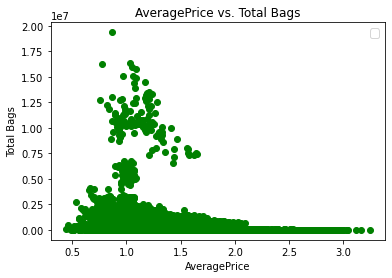

In [84]:
plt.scatter(df['AveragePrice'],df['Total Bags'], color='green' )
plt.title('AveragePrice vs. Total Bags')
plt.xlabel('AveragePrice')
plt.ylabel('Total Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

In [ ]:
## The smaller bags are the higher number of bags that are taken than the other size bags, Large and XLarge.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


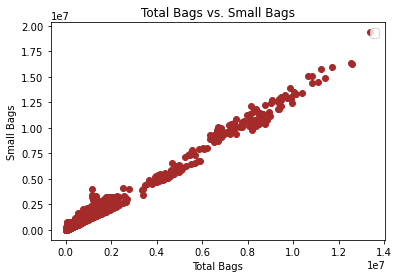

In [85]:
plt.scatter(df['Small Bags'],df['Total Bags'], color='brown' )
plt.title('Total Bags vs. Small Bags')
plt.xlabel('Total Bags')
plt.ylabel('Small Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


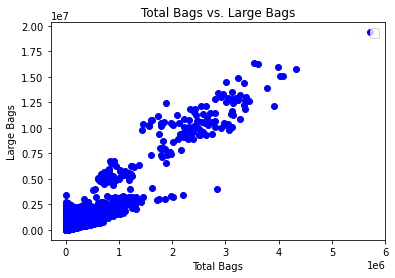

In [86]:
plt.scatter(df['Large Bags'],df['Total Bags'], color='blue' )
plt.title('Total Bags vs. Large Bags')
plt.xlabel('Total Bags')
plt.ylabel('Large Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


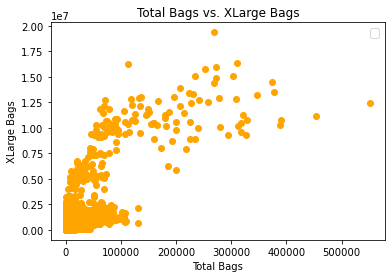

In [87]:
plt.scatter(df['XLarge Bags'], df['Total Bags'], color='orange' )
plt.title('Total Bags vs. XLarge Bags')
plt.xlabel('Total Bags')
plt.ylabel('XLarge Bags')
plt.legend(loc="upper right", fontsize=12)
plt.show()

In [ ]:
## Scatter Matrix Plot

array([[<AxesSubplot:xlabel='Total Bags', ylabel='Total Bags'>,
        <AxesSubplot:xlabel='Small Bags', ylabel='Total Bags'>,
        <AxesSubplot:xlabel='Large Bags', ylabel='Total Bags'>,
        <AxesSubplot:xlabel='XLarge Bags', ylabel='Total Bags'>],
       [<AxesSubplot:xlabel='Total Bags', ylabel='Small Bags'>,
        <AxesSubplot:xlabel='Small Bags', ylabel='Small Bags'>,
        <AxesSubplot:xlabel='Large Bags', ylabel='Small Bags'>,
        <AxesSubplot:xlabel='XLarge Bags', ylabel='Small Bags'>],
       [<AxesSubplot:xlabel='Total Bags', ylabel='Large Bags'>,
        <AxesSubplot:xlabel='Small Bags', ylabel='Large Bags'>,
        <AxesSubplot:xlabel='Large Bags', ylabel='Large Bags'>,
        <AxesSubplot:xlabel='XLarge Bags', ylabel='Large Bags'>],
       [<AxesSubplot:xlabel='Total Bags', ylabel='XLarge Bags'>,
        <AxesSubplot:xlabel='Small Bags', ylabel='XLarge Bags'>,
        <AxesSubplot:xlabel='Large Bags', ylabel='XLarge Bags'>,
        <AxesSubplot:xlabel='XL

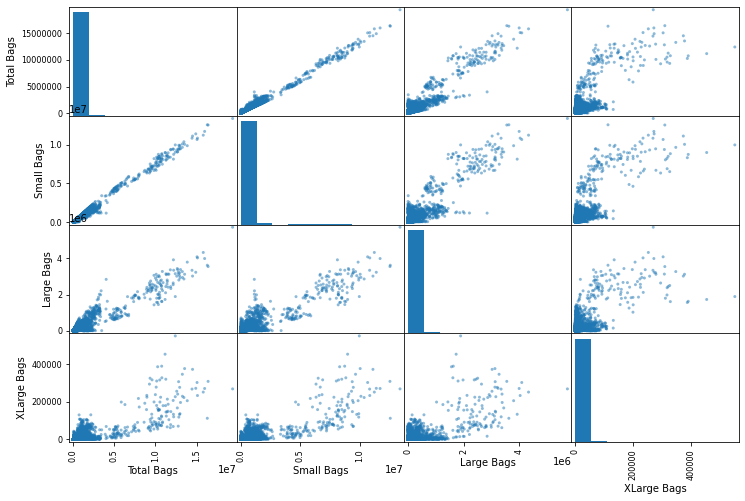

In [89]:
from pandas.plotting import scatter_matrix

attributes = ["Total Bags", "Small Bags", "Large Bags",
              "XLarge Bags"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [ ]:
Split Test
Thsi is the training of the Regression model.

I first split up the data into an X array that contains the features to train on, and a y array with the target variable.


In [90]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
test_set.head()

,AveragePrice,Total Volume,Small Hass Size,Large Hass Size,XLarge Hass Size,Total Bags,Small Bags,Large Bags,XLarge Bags,year,conventional,organic
8604,0.82,218329.70,79239.58,26356.05,2998.74,109735.33,73393.34,34338.97,2003.02,2018,1.0,0.0
2608,0.97,391514.43,228324.13,72749.38,100.62,90340.30,44449.47,45890.83,0.00,2015,1.0,0.0
14581,1.44,3907.40,1147.09,39.51,0.00,2720.80,2717.47,3.33,0.00,2016,0.0,1.0
4254,0.97,267953.78,150786.30,27025.48,565.65,89576.35,74664.71,14911.64,0.00,2016,1.0,0.0
16588,1.45,8805.28,828.39,3.24,0.00,7973.65,7456.43,517.22,0.00,2017,0.0,1.0


In [91]:
Y_train = train_set['AveragePrice']
X_train = train_set.drop(['AveragePrice'],axis = 1)

In [92]:
Y_test = test_set['AveragePrice']
X_test = test_set.drop(['AveragePrice'],axis = 1)

In [ ]:
Going to be using Linear Regression because the target variable, Average Price is continuous.


In [94]:
from sklearn.linear_model import LinearRegression

In [ ]:
Linear Regression
Creating and Training the Model

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

In [96]:
pred = LR.predict(X_test)
mean_squared_error(pred, Y_test)

0.09760990350810805

In [ ]:
The RMSE is low so it was a good model


In [97]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor (n_estimators = 100, min_samples_leaf = 10, random_state = 42)
RFR.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=10, random_state=42)

In [98]:
pred2 = RFR.predict(X_test)
mean_squared_error(pred2, Y_test)

0.037579361799355254

In [ ]:
This, Random Forest Regression is much better than Linear Regression... the smaller the number, the better the result!

RMSE is lower than the previous model, so the RandomForest Regressor is the best model.


In [ ]:
Support Vector Regression

This is the Support Vector Regression

In [120]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=2.5, random_state=50)
svm_reg.fit(X_train, Y_train)

LinearSVR(epsilon=2.5, random_state=50)

In [121]:
pred2 = svm_reg.predict(X_test)
mean_squared_error(pred2, Y_test)

7.264710573126883

In [ ]:
This prediction is much higher

With all 3 Regression tests, the best result is the Random Forest Regression!

Conclusion With the statistics drawn from the analysis, I found out which price is highly positively and negatively coorelated with. Not all the features are correlated with the Average Price column. Instead, most of them are correlated with each other.

Found out through the analysis, which model worked better with accuracy from the help of RMSE scores. Get to know where to use Linear, Random Forest and Support Vector and fine tuned the predictions.